<a href="https://colab.research.google.com/github/ShuvamAich/ChestXRay-Analysis/blob/main/PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chest X-Ray Analysis**

# Importing the dataset

In [ ]:
train_normal="/content/drive/MyDrive/chest_xray/train/NORMAL"
train_covid="/content/drive/MyDrive/chest_xray/train/PNEUMONIA"
test_normal="/content/drive/MyDrive/chest_xray/test/NORMAL"
test_covid="/content/drive/MyDrive/chest_xray/test/PNEUMONIA"

# Normal

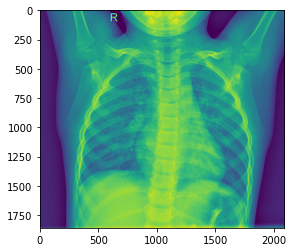

In [ ]:
import matplotlib.pyplot as plt
im = plt.imread('/content/drive/MyDrive/chest_xray/train/NORMAL/IM-0115-0001.jpeg')
plt.imshow(im)
plt.show()

#Pneumonia

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


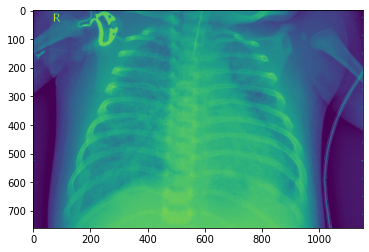

In [ ]:
import matplotlib.pyplot as plt
im = plt.imread('/content/drive/MyDrive/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg')
plt.imshow(im)
plt.show()


#Dataframe Creation using Pandas

In [ ]:
import os
import pandas as pd
filenames = os.listdir("/content/drive/MyDrive/chest_xray/train/NORMAL")
categories = []
for filename in filenames:
    category = filename.split('-')[0]
    if category == 'IM':
        categories.append(1)
    else:
        categories.append(0)

df1= pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [ ]:

import os
import pandas as pd
filenames = os.listdir("/content/drive/MyDrive/chest_xray/train/PNEUMONIA")
categories = []
for filename in filenames:
    category = filename.split('1')[0]
    if category == 'person':
        categories.append(0)
    else:
        categories.append(1)

df2= pd.DataFrame({
    'filename': filenames,
    'category': categories
})

#Plotting the dataframe

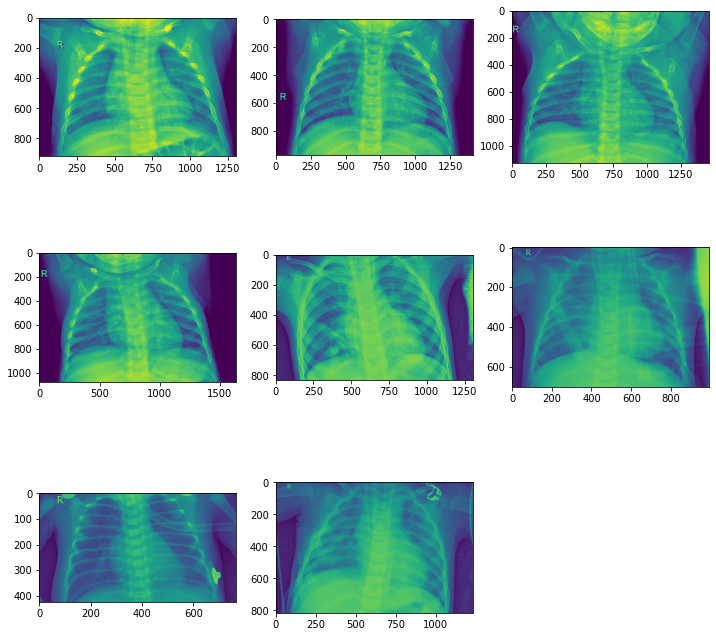

In [ ]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg #The image module supports basic image loading, rescaling and display operations.

train_cat_fnames = os.listdir("/content/drive/MyDrive/chest_xray/train/NORMAL")
train_dog_fnames = os.listdir("/content/drive/MyDrive/chest_xray/train/PNEUMONIA")
nrows = 3
ncols = 3
pic_index = 0
pic_index += 4
next_cat_pix = [os.path.join("/content/drive/MyDrive/chest_xray/train/NORMAL", fname)
               for fname in train_cat_fnames[pic_index-4:pic_index]]
next_dog_pix = [os.path.join("/content/drive/MyDrive/chest_xray/train/PNEUMONIA", fname)
               for fname in train_dog_fnames[pic_index-4:pic_index]]
fig=plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)
for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

#Model using Keras- The CNN Architecture

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras import regularizers

In [ ]:
import keras.backend as K
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import tensorflow as tf

In [ ]:

from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
'''
img_input = layers.Input(shape=(150, 150, 3))

x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Convolution2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)

x = layers.Dense(512, activation='relu')(x)

x = layers.Dropout(0.5)(x)

output = layers.Dense(1, activation='sigmoid')(x)

model = Model(img_input, output)
model.summary()


import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv3D, BatchNormalization
from keras import optimizers
from keras import backend as K
model = Sequential()
model.add(Conv2D(16, kernel_size=(3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
        bias_regularizer=regularizers.l2(1e-4), activity_regularizer=regularizers.l2(1e-5)))
model.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
        bias_regularizer=regularizers.l2(1e-4),activity_regularizer=regularizers.l2(1e-5)))
model.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
        bias_regularizer=regularizers.l2(1e-4),activity_regularizer=regularizers.l2(1e-5)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-5)))
print(model.summary())


'''

inputs = layers.Input(shape=(150, 150, 3))

# First conv block
x = Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
x = Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)

# Second conv block
x = layers.SeparableConv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = layers.SeparableConv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)

# Third conv block
x = layers.SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = layers.SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)

# Fourth conv block
x = layers.SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = layers.SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.2)(x)

# Fifth conv block
x = layers.SeparableConv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = layers.SeparableConv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.2)(x)

# FC layer
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(rate=0.7)(x)
x = Dense(units=128, activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Dense(units=64, activation='relu')(x)
x = Dropout(rate=0.3)(x)

# Output layer
output = Dense(units=1, activation='sigmoid')(x)
model = Model(img_input, output)
model.summary()

ValueError: ignored

#Image Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_data = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_data = ImageDataGenerator(rescale=1./255)

train_generator = train_data.flow_from_directory(
        "/content/drive/MyDrive/chest_xray/train", 
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=10,
        class_mode='binary')

validation_generator = test_data.flow_from_directory(
        "/content/drive/MyDrive/chest_xray/test",
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

test_generator = test_data.flow_from_directory(
        "/content/drive/MyDrive/chest_xray/val",
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

Found 5223 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

#Compiling our model 

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.optimizers import Adam

model.compile(loss='binary_crossentropy',
             optimizer=Adam(lr=1.0,epsilon=None, decay=0.0),
             metrics=['acc'])


NameError: ignored

#Training the model

In [ ]:
history = model.fit_generator(
     train_generator,
     steps_per_epoch=500,  # 2000 images = batch_size * steps
     epochs=10,
     validation_data=validation_generator,
     validation_steps=62,  # 1000 images = batch_size * steps
     verbose=1)

In [ ]:
import tensorflow as tf
from keras.models import load_model
model.save('cnn.h5')

In [ ]:
import sys
from matplotlib import pyplot
# plot loss
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['acc'], color='blue', label='train')
pyplot.plot(history.history['val_acc'], color='orange', label='test')
pyplot.show()

In [ ]:
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],'b',label='validation loss')
plt.xlabel('#epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['acc'],'r',label='training accuracy')
plt.plot(history.history['val_acc'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
'''
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


#making the input module
model = load_model('cnn.h5')
img = image.load_img('/content/drive/MyDrive/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg', target_size = (150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
plt.imshow(img)
plt.show()
img_data = preprocess_input(x)
classes = model.predict(img_data)
print(classes)  
'''  


import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input



uploaded =  files.upload()
model = load_model('cnn.h5')
for fn in uploaded.keys():
    #image prediction
    path = '/content/' + fn
    img = image.load_img(path, target_size = (150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    img_data = preprocess_input(x)
    images = np.vstack([x])
    classes = model.predict(images, batch_size = 10)
    plt.imshow(img)
    plt.show()
    classes = model.predict(img_data)
    print(classes)  



# **Transfer Learning**

# Inception V3

In [ ]:

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(
    input_shape=(150, 150, 3), include_top=False, weights=None)
pre_trained_model.load_weights(local_weights_file)

In [ ]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
# add a global spatial average pooling layer
x = pre_trained_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
# this is the model we made and trained
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(1, activation='sigmoid')(x)

In [ ]:
# this is the model we will train
model = Model(inputs=pre_trained_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in pre_trained_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(lr=0.01),
             metrics=['acc'])
model.summary()

In [ ]:
# train the model on the new data for a few epochs
model.fit_generator(train_generator,
     steps_per_epoch=500,  # 2000 images = batch_size * steps
     epochs=5,
     validation_data=validation_generator,
     validation_steps=62,  # 1000 images = batch_size * steps
     verbose=1)

#Fine Tuning Model

In [ ]:
# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
last_layer = pre_trained_model.get_layer('mixed5')
last_output = last_layer.output
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)
model.compile(loss='binary_crossentropy',
            optimizer=RMSprop(lr=0.0001),
            metrics=['acc'])
# train the model on the new data for a few epochs
model.fit_generator(train_generator,
     steps_per_epoch=500,  # 2000 images = batch_size * steps
     epochs=15,
     validation_data=validation_generator,
     validation_steps=62,  # 1000 images = batch_size * steps
     verbose=1)

#InceptionResNetV2 Model

In [ ]:
import tensorflow
model1 = tensorflow.keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=False, 
                                                         weights='imagenet', 
                                                         input_shape=(150,150,3))

In [ ]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Dropout
# add a global spatial average pooling layer
for layer in pre_trained_model.layers:
    layer.trainable = False
    
last_layer = model1.get_layer("mixed_7a")
output = last_layer.output


x = GlobalAveragePooling2D()(output)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)

x = Dropout(0.5)(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=model1.input, outputs=predictions)

In [ ]:
from tensorflow.keras.optimizers import SGD
# compile the model (should be done *after* setting layers to non-trainable)
model.compile(loss='binary_crossentropy',
             optimizer=SGD(lr=0.001, momentum=0.9, decay=0.01, nesterov=True),
             metrics=['acc'])

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=500,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=62,
      verbose=1)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

trained1_model = VGG16(include_top=False, 
                      weights="imagenet", 
                      input_shape=(150,150,3))
trained1_model.summary()

In [ ]:
from tensorflow.keras import Model,layers

    
last_layer = trained1_model.get_layer("block5_conv3")
output = last_layer.output

x = layers.GlobalAveragePooling2D()(output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.5)(x)
y = layers.Dense(1, activation='sigmoid')(x)

model = Model(trained1_model.input, y)

In [ ]:
flag = False

for layer in trained1_model.layers:
  if flag:
    layer.trainable = True
  if layer.name == 'block4_conv3':
    flag = True

In [ ]:
from tensorflow.keras.optimizers import SGD


model.compile(loss='binary_crossentropy',
              optimizer=SGD(
                  lr=0.0001, 
                  momentum=0.9),
              metrics=['acc'])

In [ ]:
X = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=25,
      verbose=1)

In [ ]:

import sys
from matplotlib import pyplot
# plot loss
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(X.history['loss'], color='blue', label='train')
pyplot.plot(X.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(X.history['acc'], color='blue', label='train')
pyplot.plot(X.history['val_acc'], color='orange', label='test')
pyplot.show()

In [ ]:
X = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=25,
      verbose=1)

In [ ]:
import sys
from matplotlib import pyplot
# plot loss
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(X.history['loss'], color='blue', label='train')
pyplot.plot(X.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(X.history['acc'], color='blue', label='train')
pyplot.plot(X.history['val_acc'], color='orange', label='test')
pyplot.show()


In [ ]:
'''
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg



uploaded =  files.upload()

for fn in uploaded.keys():
    #image prediction
    path = '/content/' + fn
    img = image.load_img(path, target_size = (150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size = 10)
    plt.imshow(img)
    plt.show()
    print(classes[0])
    if (classes[0] < 1.0):
        classes[0] = 0
        print("Normal")
    else:
        classes[0] = 1
        print("Pneumonia")
    print(classes[0]) 

'''
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


#making the input module
model = load_model('cnn.h5')
img = image.load_img('', target_size = (150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
plt.imshow(img)
plt.show()
img_data = preprocess_input(x)
classes = model.predict(img_data)
print(classes)